In [1]:
import pandas as pd
import numpy as np
import bluebelt as blue

In [2]:
nrows = 100
ncols = 6

np.random.seed(27)
series = pd.Series(np.random.weibull(7,nrows) * 100, index=pd.date_range(start='1-1-2020', periods=nrows), name='process A')
frame = pd.DataFrame(np.random.normal(loc=100, scale=20, size=ncols*nrows).reshape(nrows, ncols), index=pd.date_range(start='1-1-2020', periods=nrows), columns=[f'process {col}' for col in range(1, ncols+1)])

In [3]:
series.blue.pattern.periodical()

Periodical(n=100, rule=1W, how=mean, resolution=None, confidence=0.8, outlier_sigma=2, adjust=True, outliers=4)

In [4]:
series.index.view(int)

array([1577836800000000000, 1577923200000000000, 1578009600000000000,
       1578096000000000000, 1578182400000000000, 1578268800000000000,
       1578355200000000000, 1578441600000000000, 1578528000000000000,
       1578614400000000000, 1578700800000000000, 1578787200000000000,
       1578873600000000000, 1578960000000000000, 1579046400000000000,
       1579132800000000000, 1579219200000000000, 1579305600000000000,
       1579392000000000000, 1579478400000000000, 1579564800000000000,
       1579651200000000000, 1579737600000000000, 1579824000000000000,
       1579910400000000000, 1579996800000000000, 1580083200000000000,
       1580169600000000000, 1580256000000000000, 1580342400000000000,
       1580428800000000000, 1580515200000000000, 1580601600000000000,
       1580688000000000000, 1580774400000000000, 1580860800000000000,
       1580947200000000000, 1581033600000000000, 1581120000000000000,
       1581206400000000000, 1581292800000000000, 1581379200000000000,
       1581465600000

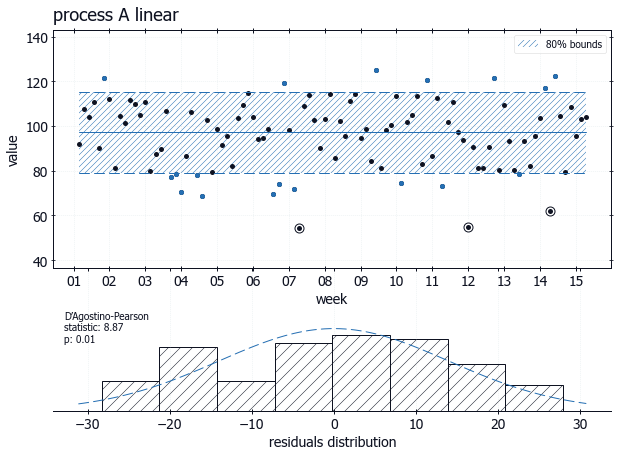

In [5]:
series.blue.pattern.polynomial().plot()

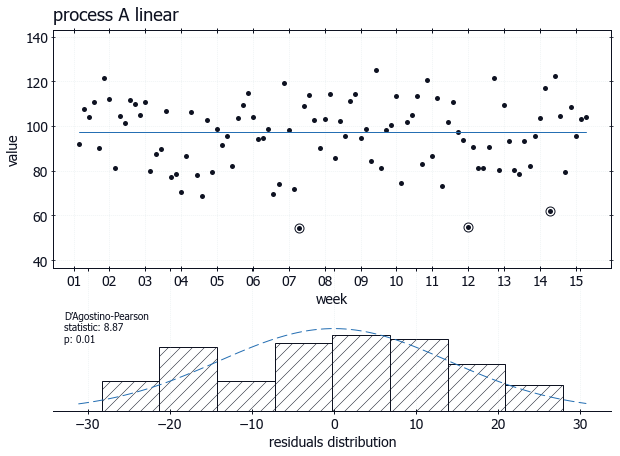

In [6]:
series.blue.pattern.polynomial().plot(bounds=False)

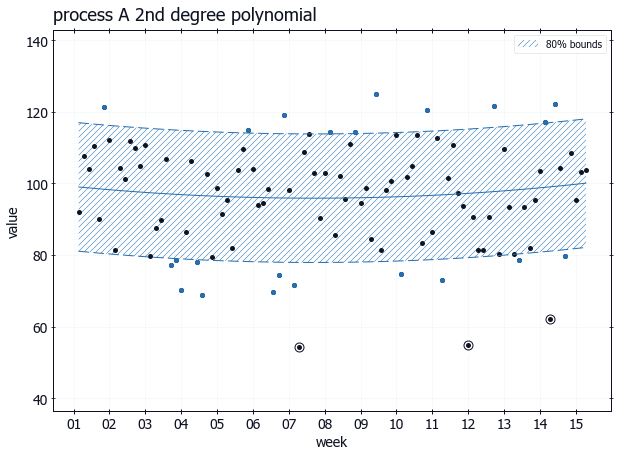

In [7]:
series.blue.pattern.polynomial(shape=2).plot(residuals=False)

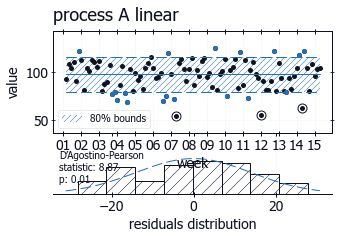

In [8]:
series.blue.pattern.polynomial().plot(figsize=(5,3))

In [9]:
series.blue.pattern.periodical()

Periodical(n=100, rule=1W, how=mean, resolution=None, confidence=0.8, outlier_sigma=2, adjust=True, outliers=4)

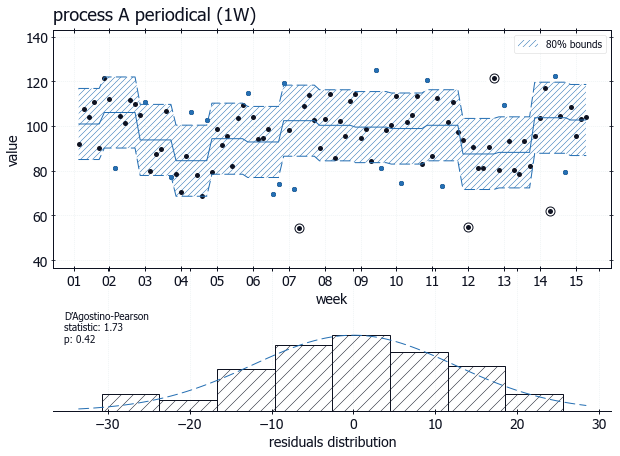

In [10]:
series.blue.pattern.periodical().plot()

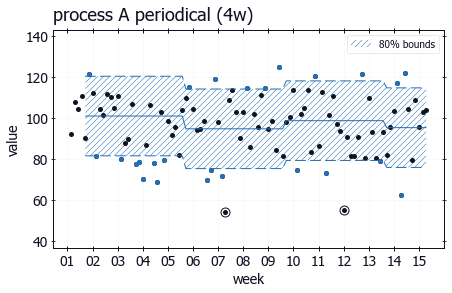

In [11]:
series.blue.pattern.periodical(rule='4w').plot(figsize=(7,4), residuals=False, bounds=True)

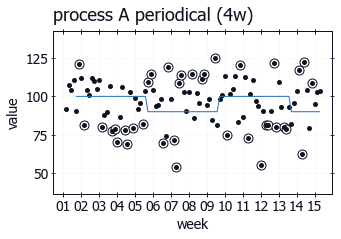

In [12]:
series.blue.pattern.periodical(rule='4w', resolution=10, outlier_sigma=1, adjust=False).plot(figsize=(5,3), residuals=False, bounds=False)

In [13]:
# break the series
breaks = series.shape[0] // 5
loc = list(np.arange(0+breaks, series.shape[0], breaks))
series.iloc[loc] = np.nan

# break the frame
breaks = frame.shape[0] // 5
loc = list(np.arange(0+breaks, frame.shape[0], breaks))
for x in range(frame.shape[1]):
    frame.iloc[loc,x] = np.nan

/Users/Arvid/opt/anaconda3/lib/python3.8/site-packages/numpy/polynomial/polynomial.py:1361: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


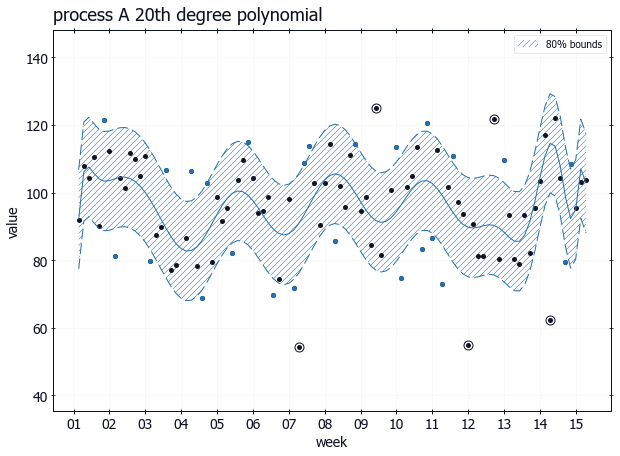

In [16]:
series.blue.pattern.polynomial(shape=20).plot(residuals=False)